In [2]:
import numpy as np
import pandas as pd
import os
from dataloader2 import OCTDataset
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
import argparse
import os
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torch.utils.data import ConcatDataset
import time


root = os.getcwd()
train = os.path.join(root, "df_prime_train.csv")
test = os.path.join(root, "df_prime_test.csv")



LABELS_SEVERITY = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}

'''
def normalize_array(arr):
    """
    Normalize a 1D NumPy array to have values between 0 and 1.
    """
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)
    return normalized_arr
'''


'''Obtain Dataset Images (image, label)'''


mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)


# horizontal flip transform
transformHor = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.ToTensor(),
    normalize,
])

# crop transform
transformCrop = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.CenterCrop((224 - 25 - 25, 224)),
    transforms.ToTensor(),
    normalize
])

# blur transform
transformBlur = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    normalize
])

transform2 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    normalize,
])


args = 'C:/Users/jgril/Documents/GitHub/8803_Final_Project'

image_trainset = OCTDataset(args, 'train', transform=transform2)
image_testset = OCTDataset(args, 'test', transform=transform2)

# create augment versions of the dataset
flip_trainset = OCTDataset(args, 'train', transform=transformHor)
blur_trainset = OCTDataset(args, 'train', transform=transformBlur)
crop_trainset = OCTDataset(args, 'train', transform=transformCrop)

23272
(tensor([[[-0.6407, -0.6964, -0.7892,  ..., -0.7521, -0.7892, -0.7706],
         [-0.6964, -0.6778, -0.7149,  ..., -0.7521, -0.7892, -0.7892],
         [-0.7521, -0.7521, -0.6778,  ..., -0.7521, -0.7706, -0.7521],
         ...,
         [-0.8078, -0.8078, -0.8078,  ..., -0.8078, -0.8078, -0.8078],
         [-0.8078, -0.8078, -0.8078,  ..., -0.8078, -0.8078, -0.8078],
         [-0.8078, -0.8078, -0.8078,  ..., -0.8078, -0.8078, -0.8078]]]), 2, tensor([ 40.0000,   1.0000,   0.0000,   1.0000,  12.0000,  34.9340,  93.0000,
         65.0000, 222.0000]))


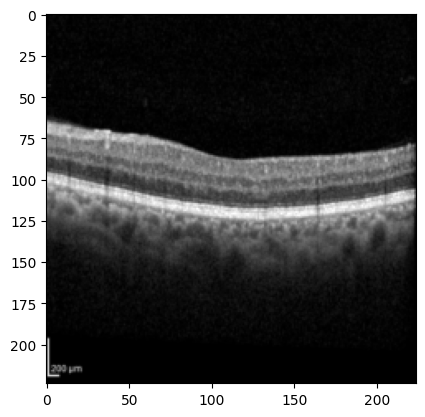

In [3]:
print(len(image_trainset))
print(image_trainset[20000])
plt.imshow(torch.reshape(image_trainset[20000][0],shape=(224,224,1)),cmap='gray')

torch.Size([1, 174, 224])


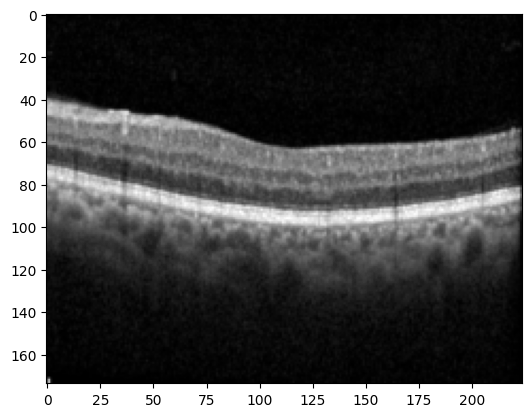

In [4]:
print(crop_trainset[2000][0].shape)

plt.imshow(torch.reshape(crop_trainset[20000][0],shape=(174,224,1)),cmap='gray')

In [3]:
'''
# count pictures in each class for TRAINING DATA
class_counts = {}
for _, label in image_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Training Data Class counts:", class_counts)
print()

# count pictures in each class for TESTING DATA
class_counts = {}
for _, label in image_testset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Testing Data Class counts:", class_counts)
print()

'''


""" For Class 0 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_0 = Subset(flip_trainset, indices)

""" For Class 1 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 1]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_1 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1
print("Flip Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_0))
print()
'''

""" For Class 2 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_2 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Flip Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_2))
print()
'''

""" For Class 0 Blur"""

# get the labels
labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_0 = Subset(blur_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_0:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_0))
print()
'''

""" For Class 1 Blur"""

# get the labels
labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 1]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_1 = Subset(blur_trainset, indices)



""" For Class 2 Blur"""

labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_2 = Subset(blur_trainset, indices)


'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_2))
print()
'''

# New Dataset with extra class 2 images
concatenated_dataset = ConcatDataset([image_trainset, blur_trainset_class_2])
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in concatenated_dataset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Concated Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in concatenated_dataset:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(concatenated_dataset))


ValueError: too many values to unpack (expected 2)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
time.sleep(3800)
num_classes = 3
num_epochs = 10


raw_train_dataset = crop_trainset
test_dataset = image_testset

train_labels = [label for _, label, _ in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, stratify=train_labels)

print("Data Has Split")

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
# Replace last fully connected layer with a new one
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=lr, weight_decay=gamma)


# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_acc = []
val_acc = []

train_losses = []
val_losses = []



# Define the two AlexNet models
img_alexnet = models.alexnet(pretrained=False)
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
img_alexnet.classifier[6] = nn.Linear(4096, num_classes) # Replace the final layer with a new one

metadata_alexnet = models.alexnet(pretrained=False)
metadata_alexnet.classifier[6] = nn.Linear(4096, num_classes) # Replace the final layer with a new one

# Define the combined model
class CombinedModel(nn.Module):
    def __init__(self, img_alexnet, metadata_alexnet):
        super(CombinedModel, self).__init__()
        self.img_alexnet = img_alexnet
        self.metadata_alexnet = metadata_alexnet
        self.fc = nn.Linear(8192, num_classes) # Add a new final layer to combine the outputs
    
    def forward(self, img_input, metadata_input):
        img_output = self.img_alexnet(img_input)
        metadata_output = self.metadata_alexnet(metadata_input)
        combined_output = torch.cat((img_output, metadata_output), 1)
        final_output = self.fc(combined_output)
        return final_output

model = CombinedModel(img_alexnet, metadata_alexnet)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=0.001)



print("Training...")
# Train the model on your data
for epoch in range(num_epochs):
    print(epoch)
    for i, (img_data, metadata_data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        img_output = img_alexnet(img_data)
        metadata_output = metadata_alexnet(metadata_data)
        combined_output = torch.cat((img_output, metadata_output), 1)
        final_output = model.fc(combined_output)
        loss = criterion(final_output, labels)
        loss.backward()
        optimizer.step()


Data Has Split


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training...
0


RuntimeError: Given groups=1, weight of size [64, 3, 11, 11], expected input[64, 1, 174, 224] to have 3 channels, but got 1 channels instead